# Ejercicio de Análisis exploratorio de datos

Vamos a analizar un fichero CSV sobre jugadores de baloncesto para extraer algunos gráficos e información útil sobre el mismo

En primer lugar cargamos el CSV y transformamos las columnas de alturas y pesos, quedándonos con las que nos interesan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.read_csv('players.csv')

# Eliminar filas con nulos y contar cuántas son
datos.dropna(inplace=True)

# Convertir altura a cm
datos['height_cm'] = datos['height_feet'] * 30.48

# Convertir peso a Kg
datos['weight_kg'] = datos['weight_pounds'] * 0.45

# Selección de columnas
datos = datos[['first_name', 'last_name', 'position', 'team', 'height_cm', 'weight_kg']]

# Eliminar posiciones distintas de F, C o G
datos = datos[datos['position'].isin(['F', 'C', 'G'])]

datos

,first_name,last_name,position,team,height_cm,weight_kg
6,Alex,Abrines,G,"{'id': 21, 'abbreviation': 'OKC', 'city': 'Okl...",182.88,90.00
14,Kosta,Koufos,C,"{'id': 26, 'abbreviation': 'SAC', 'city': 'Sac...",213.36,110.25
2570,Michael,Beasley,F,"{'id': 25, 'abbreviation': 'POR', 'city': 'Por...",182.88,105.75
2572,Wade,Baldwin IV,G,"{'id': 11, 'abbreviation': 'HOU', 'city': 'Hou...",182.88,90.00
2573,Jared,Terrell,G,"{'id': 18, 'abbreviation': 'MIN', 'city': 'Min...",182.88,102.15
...,...,...,...,...,...,...
5017,Mitchell,Robinson,C,"{'id': 20, 'abbreviation': 'NYK', 'city': 'New...",213.36,108.00
5026,Collin,Sexton,G,"{'id': 29, 'abbreviation': 'UTA', 'city': 'Uta...",182.88,85.50
5027,Landry,Shamet,G,"{'id': 24, 'abbreviation': 'PHX', 'city': 'Pho...",182.88,84.60
5028,Anfernee,Simons,G,"{'id': 25, 'abbreviation': 'POR', 'city': 'Por...",182.88,83.25


## Jugadores por posición

Mostramos un gráfico circular que nos diga la proporción de jugadores de cada posición

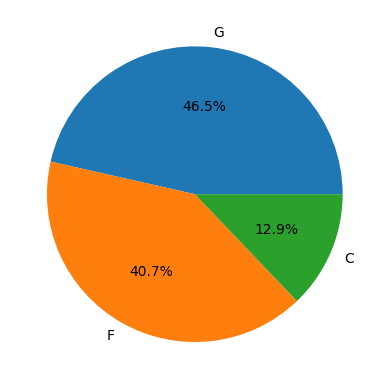

In [27]:
conteo = datos['position'].value_counts()
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%')
plt.show()

## Histograma de alturas

Vamos a representar en un histograma la distribución de alturas, junto con una línea roja para indicar la media y una verde para la mediana.

Text(0, 0.5, 'Frecuencia')

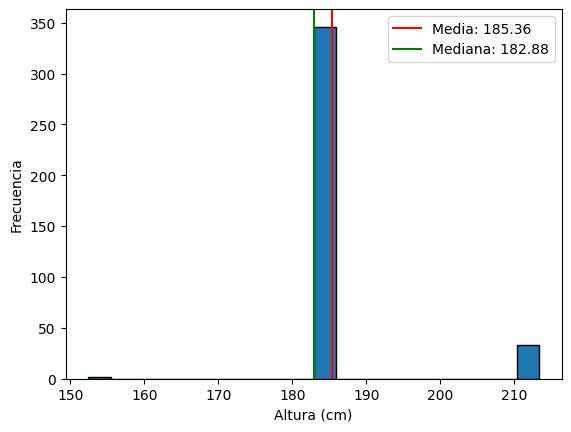

In [28]:
media = datos['height_cm'].mean()
mediana = datos['height_cm'].median()
plt.hist(datos['height_cm'], bins=20, edgecolor='black')
plt.axvline(media, color='red', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', label=f'Mediana: {mediana:.2f}')
plt.legend(loc='upper right')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')

## Selección de muestra representativa

Vamos a seleccionar una muestra de 10 jugadores que respete las proporciones de F, C y G

In [33]:
TOTAL = 10

posiciones = ['F', 'C', 'G']
conteo = datos['position'].value_counts()
proporciones = [ conteo[pos] / len(datos) for pos in posiciones ]

# Vemos cuántos tenemos que elegir de cada posición para que sumen 10
cantidades_ideales = np.array(proporciones) * TOTAL
cantidades_enteras = np.floor(cantidades_ideales).astype(int)
faltan = TOTAL - cantidades_enteras.sum()
decimales = cantidades_ideales - cantidades_enteras
indices_extra = np.argsort(-decimales)[:faltan]
for idx in indices_extra:
    cantidades_enteras[idx] += 1

equipo = pd.DataFrame()

for i in range(len(posiciones)):
  jugadores_seleccionados = datos[datos['position'] == posiciones[i]].sample(n=cantidades_enteras[i])
  equipo = pd.concat([equipo, jugadores_seleccionados], axis=0)

equipo

,first_name,last_name,position,team,height_cm,weight_kg
4729,Jae,Crowder,F,"{'id': 17, 'abbreviation': 'MIL', 'city': 'Mil...",182.88,105.75
2613,Jonathon,Simmons,F,"{'id': 23, 'abbreviation': 'PHI', 'city': 'Phi...",182.88,87.75
4476,Jonathan,Isaac,F,"{'id': 22, 'abbreviation': 'ORL', 'city': 'Orl...",182.88,94.50
3991,Kevin,Durant,F,"{'id': 24, 'abbreviation': 'PHX', 'city': 'Pho...",182.88,108.00
3173,Ante,Zizic,C,"{'id': 6, 'abbreviation': 'CLE', 'city': 'Clev...",182.88,114.30
2592,Jose,Calderon,G,"{'id': 9, 'abbreviation': 'DET', 'city': 'Detr...",182.88,90.00
4340,Eric,Gordon,G,"{'id': 13, 'abbreviation': 'LAC', 'city': 'LA'...",182.88,96.75
2584,Jordan,Loyd,G,"{'id': 28, 'abbreviation': 'TOR', 'city': 'Tor...",182.88,94.50
4722,Bradley,Beal,G,"{'id': 30, 'abbreviation': 'WAS', 'city': 'Was...",182.88,93.15
2623,Darren,Collison,G,"{'id': 14, 'abbreviation': 'LAL', 'city': 'Los...",182.88,78.75
